data cleaning + visualization for hoi dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hoi_df = pd.read_csv('Health_Opportunity_Index_20231106.csv')
hoi_df['Rural_Urban_Binary'] = hoi_df['Rural~Urban'].map({'Urban': 1, 'Rural': 0})
hoi_df['VA FIPS'] = hoi_df['Census Tract'].astype(str).str.slice(0, 5)


numeric_columns = hoi_df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('Rural_Urban_Binary')  # Remove the binary column from the list
hoi_by_county_df = hoi_df.groupby('VA FIPS')[numeric_columns].mean().reset_index()

rural_urban_mode = hoi_df.groupby('VA FIPS')['Rural_Urban_Binary'].agg(lambda x: x.mode()[0]).reset_index()

hoi_by_county_df = pd.merge(hoi_by_county_df, rural_urban_mode, on='VA FIPS', how='left')

hoi_by_county_df.head()


,VA FIPS,Census Tract,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,...,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index,Rural_Urban_Binary
0,51001,5.100109e+10,0.422137,0.016646,0.433433,0.894633,0.932252,0.674687,0.942203,0.380482,...,0.002026,0.761064,0.380994,0.100417,0.293585,0.585467,0.206405,0.369176,0.365202,0
1,51003,5.100301e+10,0.701764,0.096666,0.560608,0.873947,0.811584,0.805677,0.942644,0.390110,...,0.022883,0.798255,0.507918,0.142064,0.339419,0.713820,0.261438,0.548495,0.454451,1
2,51005,5.100508e+10,0.259633,0.025177,0.567901,0.906727,0.903520,0.686052,0.960577,0.456185,...,0.004627,0.770432,0.501220,0.106619,0.273635,0.656622,0.225572,0.249174,0.388879,1
3,51007,5.100793e+10,0.256958,0.066622,0.500000,0.897897,0.934478,0.664475,0.966964,0.461538,...,0.000490,0.794592,0.473050,0.068846,0.262371,0.588707,0.258888,0.234963,0.404860,1
4,51009,5.100901e+10,0.358042,0.092522,0.474697,0.823924,0.866836,0.669851,0.858107,0.475768,...,0.003998,0.701215,0.485773,0.070283,0.278182,0.504666,0.297025,0.354233,0.430793,1


<ipython-input-3-07115f2379da>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hoi_by_county_df.corr()


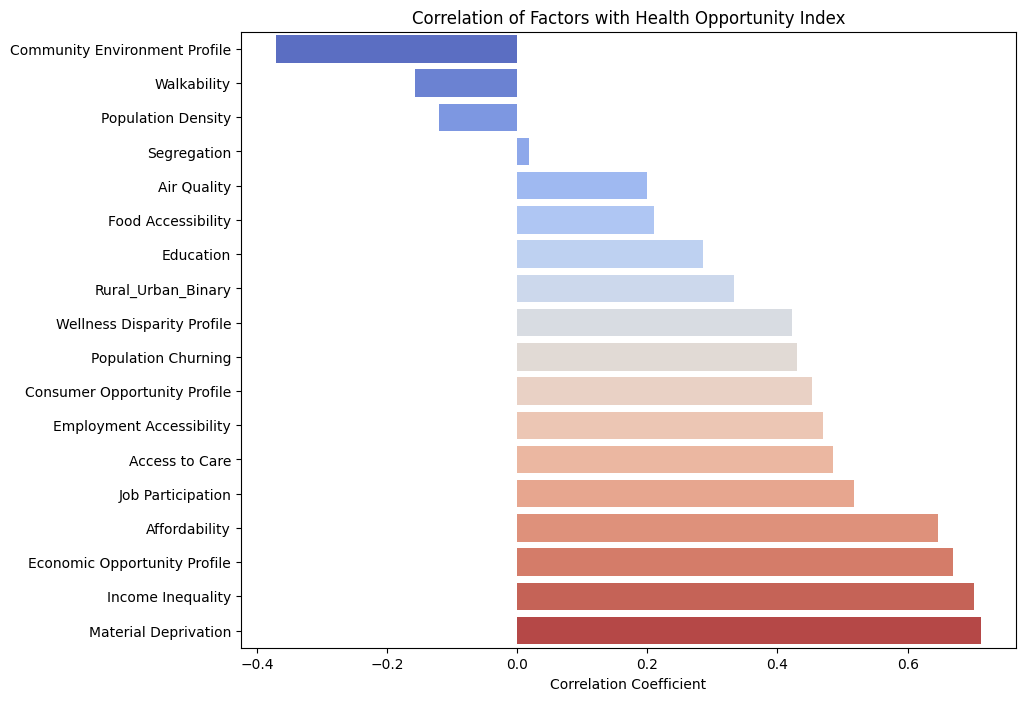

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = hoi_by_county_df.corr()
hoi_correlations = corr['Health Opportunity Index'].drop(labels=['Health Opportunity Index', 'Census Tract'])
hoi_correlations_sorted = hoi_correlations.sort_values(ascending=True)
plt.figure(figsize=(10, 8))
sns.barplot(x=hoi_correlations_sorted.values, y=hoi_correlations_sorted.index, palette='coolwarm')
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Factors with Health Opportunity Index')

plt.show()

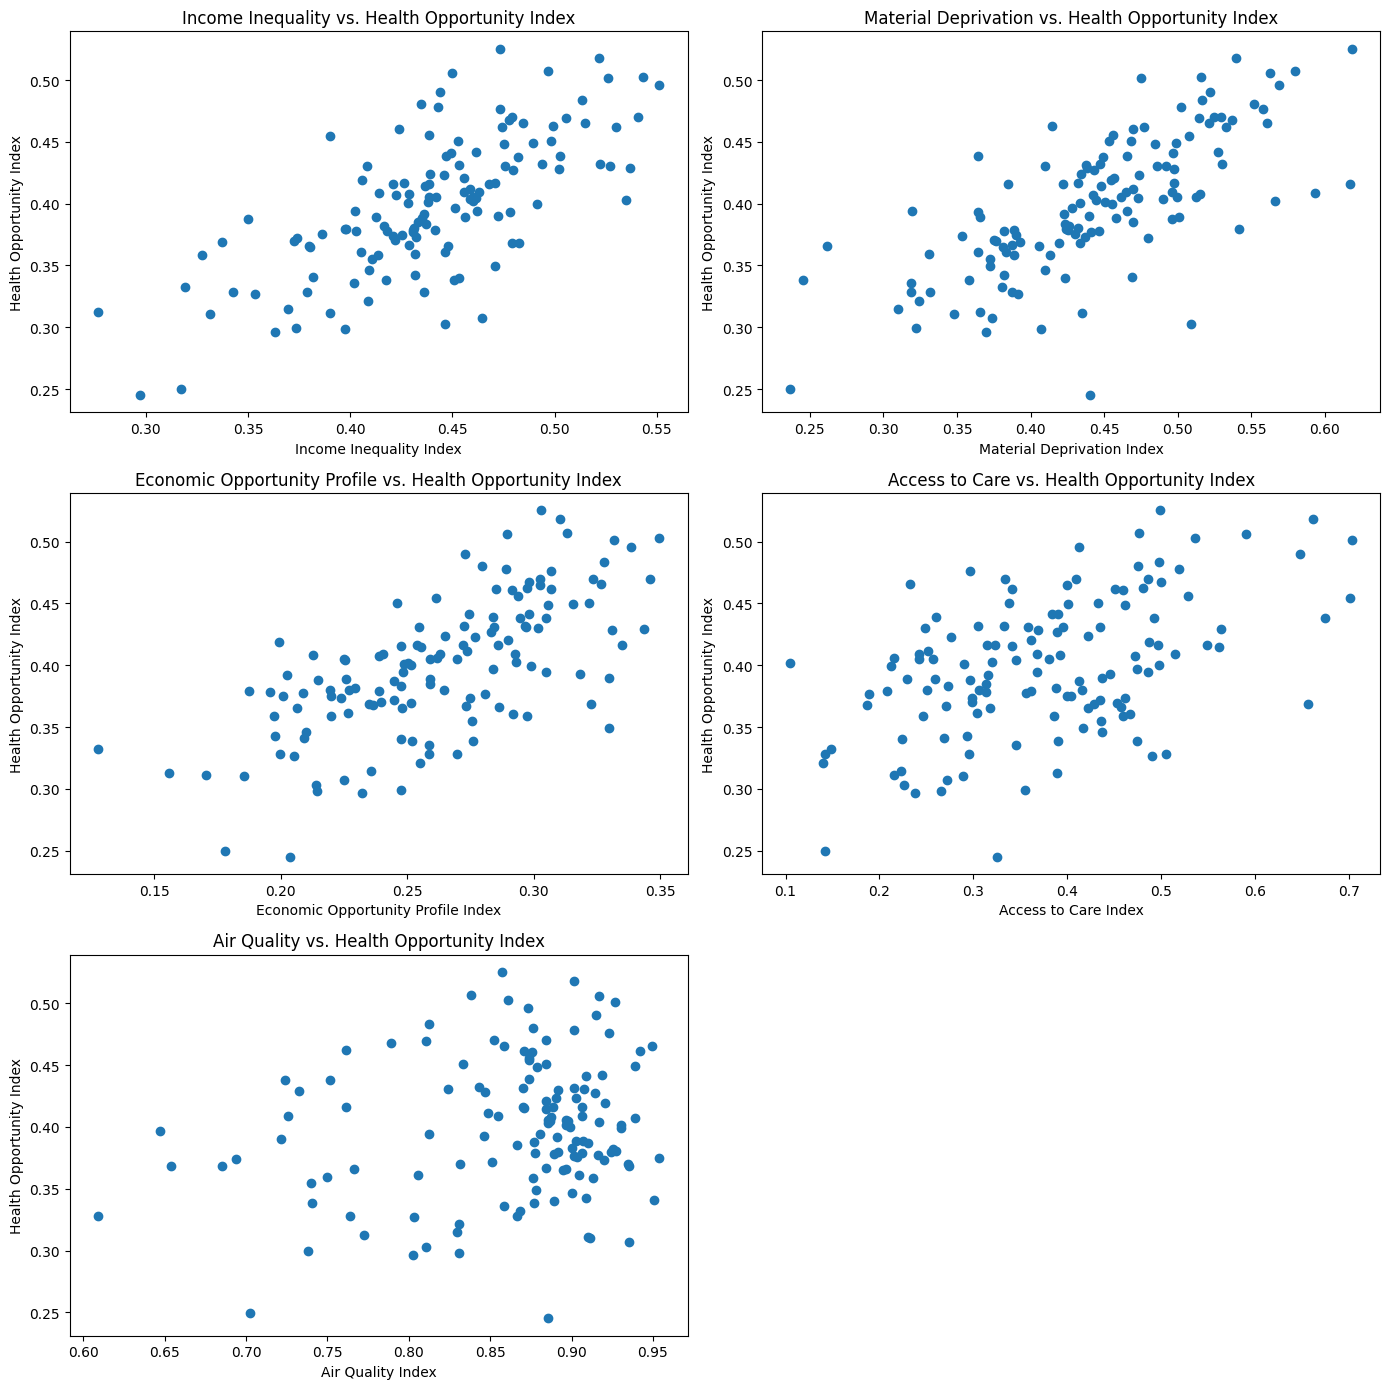

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()
variables = ['Income Inequality', 'Material Deprivation', 'Economic Opportunity Profile', 'Access to Care', 'Air Quality']
fig.delaxes(axes[-1])
for i, var in enumerate(variables):
    axes[i].scatter(hoi_by_county_df[var], hoi_by_county_df['Health Opportunity Index'])
    axes[i].set_title(f'{var} vs. Health Opportunity Index')
    axes[i].set_xlabel(f'{var} Index')
    axes[i].set_ylabel('Health Opportunity Index')
plt.tight_layout()
plt.show()

visualize overdose

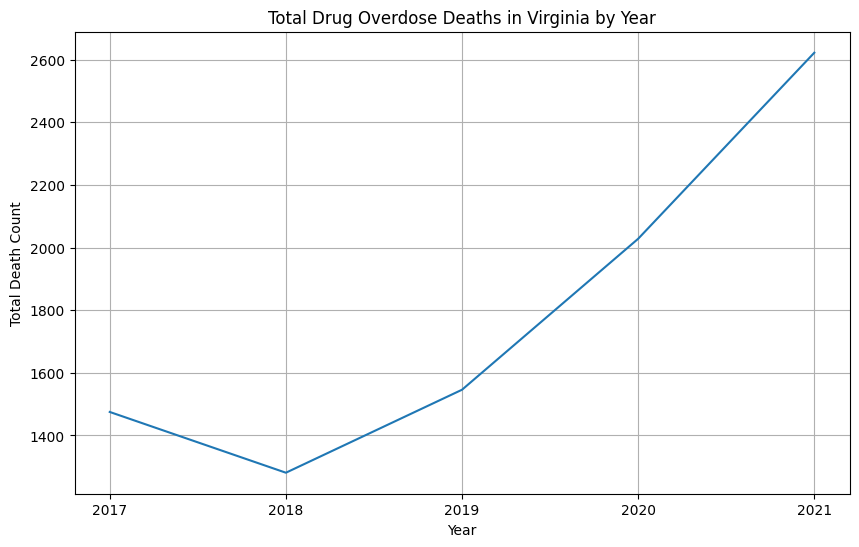

In [ ]:
overdose_df = pd.read_csv('VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv')

yearly_deaths = overdose_df.groupby('Death Year')['Death Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_deaths, x='Death Year', y='Death Count')
plt.title('Total Drug Overdose Deaths in Virginia by Year')
plt.xlabel('Year')
plt.ylabel('Total Death Count')
plt.xticks(yearly_deaths['Death Year'])
plt.grid(True)
plt.show()

combine tables

In [ ]:
overdose_df = pd.read_csv('VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv')
overdose_2021_df = overdose_df[overdose_df['Death Year'] == 2021].copy()
overdose_2021_df['VA FIPS'] = overdose_2021_df['VA FIPS'].astype(str)
hoi_by_county_df['VA FIPS'] = hoi_by_county_df['VA FIPS'].astype(str)
combined_df = pd.merge(overdose_2021_df, hoi_by_county_df, on='VA FIPS', how='left')

combined_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Death Year                     133 non-null    int64  
 1   VA FIPS                        133 non-null    object 
 2   Locality Name                  133 non-null    object 
 3   Drug Class Legend              133 non-null    object 
 4   Death Count                    133 non-null    int64  
 5   Death Rate                     133 non-null    float64
 6   Census Tract                   133 non-null    float64
 7   Access to Care                 133 non-null    float64
 8   Employment Accessibility       133 non-null    float64
 9   Affordability                  133 non-null    float64
 10  Air Quality                    133 non-null    float64
 11  Population Churning            133 non-null    float64
 12  Education                      133 non-null    flo

In [ ]:
correlation_matrix = combined_df.corr(numeric_only=True)
correlation_with_overdose = correlation_matrix[['Death Count', 'Death Rate']]
print(correlation_with_overdose)

                               Death Count  Death Rate
Death Year                             NaN         NaN
Death Count                       1.000000    0.237256
Death Rate                        0.237256    1.000000
Census Tract                      0.198379    0.228372
Access to Care                    0.250133   -0.075983
Employment Accessibility          0.451802   -0.097788
Affordability                     0.077036   -0.363995
Air Quality                      -0.403315   -0.240916
Population Churning              -0.224862    0.072094
Education                         0.284194   -0.317704
Food Accessibility                0.018997   -0.163365
Income Inequality                 0.231341   -0.106633
Job Participation                 0.380292   -0.081260
Population Density                0.365400   -0.069993
Segregation                       0.014635   -0.071642
Material Deprivation             -0.058462   -0.417386
Walkability                       0.407944    0.082822
Community 

In [ ]:
correlation_matrix = combined_df.corr(numeric_only=True)
correlation_with_overdose = correlation_matrix[['Death Count', 'Death Rate']]
print(correlation_with_overdose)

                               Death Count  Death Rate
Death Year                             NaN         NaN
Death Count                       1.000000    0.237256
Death Rate                        0.237256    1.000000
Census Tract                      0.198379    0.228372
Access to Care                    0.250133   -0.075983
Employment Accessibility          0.451802   -0.097788
Affordability                     0.077036   -0.363995
Air Quality                      -0.403315   -0.240916
Population Churning              -0.224862    0.072094
Education                         0.284194   -0.317704
Food Accessibility                0.018997   -0.163365
Income Inequality                 0.231341   -0.106633
Job Participation                 0.380292   -0.081260
Population Density                0.365400   -0.069993
Segregation                       0.014635   -0.071642
Material Deprivation             -0.058462   -0.417386
Walkability                       0.407944    0.082822
Community 

regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features and target
X = combined_df.drop(columns=['Death Year', 'Census Tract', 'VA FIPS', 'Locality Name', 'Drug Class Legend', 'Death Count', 'Death Rate', ])
y = combined_df['Death Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Print out the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# If you want to see the actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error (MSE): 387.666061151421
R-squared (R2): 0.044193391702558205
Intercept: 161191377904.90854
Coefficients:
Access to Care: 213817794834.06415
Employment Accessibility: -99234251675.39014
Affordability: 17077160964.08327
Air Quality: -27049502202.920677
Population Churning: -30723156864.04364
Education: 58870804444.8571
Food Accessibility: 43969567653.00613
Income Inequality: -59901116058.98441
Job Participation: -10048139813.714916
Population Density: 76642169861.94002
Segregation: -137389260947.1914
Material Deprivation: -10720656186.774965
Walkability: 43172413608.88266
Community Environment Profile: -98607401575.81104
Consumer Opportunity Profile: -77179118455.72818
Economic Opportunity Profile: 15502293723.835243
Wellness Disparity Profile: -320874974474.7279
Health Opportunity Index: 100477427350.68918
Rural_Urban_Binary: -1.5835952648845235
     Actual  Predicted
51     12.9  38.161896
69     39.8  13.761017
31     21.9  17.143738
42     38.9  45.287048
117    40

## Improving Linear Regression by Dropping

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features and target
X = combined_df.drop(columns=['Death Year', 'Census Tract', 'VA FIPS', 'Locality Name', 'Drug Class Legend', 'Death Count', 'Death Rate', 'Access to Care', 'Employment Accessibility', 'Population Churning', 'Income Inequality', 'Job Participation', 'Population Density', 'Segregation', 'Walkability', 'Community Environment Profile', 'Economic Opportunity Profile', 'Wellness Disparity Profile', 'Rural_Urban_Binary'])
y = combined_df['Death Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Print out the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# If you want to see the actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Mean Squared Error (MSE): 331.39114567614973
R-squared (R2): 0.18294150891686045
Intercept: 362.3038089775569
Coefficients:
Affordability: -18.472606684834822
Air Quality: -131.72067459008358
Education: -236.04578769062408
Food Accessibility: -52.24941190293386
Material Deprivation: -30.97696389757388
Consumer Opportunity Profile: 29.30016763131368
Health Opportunity Index: 16.803849878113393
     Actual  Predicted
51     12.9  42.979903
69     39.8  27.497998
31     21.9  24.683691
42     38.9  42.089919
117    40.2  35.668956
77      8.8  29.318418
127    11.9  35.986261
56     34.2  24.084424
40     50.5  42.077049
12     49.9  37.907465
81     20.5  28.358128
26     34.9  48.338365
108    63.5  39.301876
100    87.2  49.898965
66     41.8  41.831097
83     11.3  38.731498
4      37.9  49.033979
27     64.0  42.705382
19     59.2  44.166873
123    21.9  22.539111
36     12.3  24.686003
16     61.6  38.112103
18     29.3  42.689307
10     32.1  33.409999
65     45.1  28.248277
44    

## Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the datasets
file_path_health = 'Health_Opportunity_Index_20231106.csv'
file_path_deaths = 'VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv'

health_df = pd.read_csv(file_path_health)
deaths_df = pd.read_csv(file_path_deaths)

# Extract 'VA FIPS' code from 'Census Tract' in health_df
health_df['VA FIPS'] = health_df['Census Tract'].astype(str).str[:5].astype(int)

# Merge the datasets on 'VA FIPS'
combined_df = pd.merge(deaths_df, health_df, on='VA FIPS')

# Identifying categorical columns
categorical_cols = combined_df.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(combined_df[categorical_cols])

# Creating a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Dropping original categorical columns and concatenating encoded columns
combined_df_encoded = combined_df.drop(columns=categorical_cols)
combined_df_encoded = pd.concat([combined_df_encoded.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Updating the column names list to drop, ensuring they exist in the combined dataset
columns_to_drop = ['Death Year', 'Census Tract', 'VA FIPS', 'Death Count', 'Death Rate']
columns_to_drop = [col for col in columns_to_drop if col in combined_df_encoded.columns]

# Selecting features and target variable
X_encoded = combined_df_encoded.drop(columns=columns_to_drop)
y_encoded = combined_df_encoded['Death Rate']

# Splitting the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model_encoded = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model_encoded.fit(X_train_encoded, y_train_encoded)

# Predict on the testing set
y_pred_encoded = rf_model_encoded.predict(X_test_encoded)

# Calculate metrics
mse_rf_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
r2_rf_encoded = r2_score(y_test_encoded, y_pred_encoded)

print(f'Mean Squared Error (MSE): {mse_rf_encoded}')
print(f'R-squared (R2): {r2_rf_encoded}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error (MSE): 156.69315044833718
R-squared (R2): 0.3382879647159619


Improve

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the datasets
file_path_health = 'Health_Opportunity_Index_20231106.csv'
file_path_deaths = 'VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv'

health_df = pd.read_csv(file_path_health)
deaths_df = pd.read_csv(file_path_deaths)

# Extract 'VA FIPS' code from 'Census Tract' in health_df
health_df['VA FIPS'] = health_df['Census Tract'].astype(str).str[:5].astype(int)

# Merge the datasets on 'VA FIPS'
combined_df = pd.merge(deaths_df, health_df, on='VA FIPS')

# Identifying categorical columns
categorical_cols = combined_df.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(combined_df[categorical_cols])

# Creating a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Dropping original categorical columns and concatenating encoded columns
combined_df_encoded = combined_df.drop(columns=categorical_cols)
combined_df_encoded = pd.concat([combined_df_encoded.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Updating the column names list to drop, ensuring they exist in the combined dataset
columns_to_drop = ['Death Year', 'Census Tract', 'VA FIPS', 'Locality Name', 'Drug Class Legend', 'Death Count', 'Death Rate', 'Access to Care', 'Population Churning', 'Job Participation', 'Population Density', 'Segregation', 'Walkability', 'Community Environment Profile', 'Economic Opportunity Profile', 'Wellness Disparity Profile', 'Rural_Urban_Binary']
columns_to_drop = [col for col in columns_to_drop if col in combined_df_encoded.columns]

# Selecting features and target variable
X_encoded = combined_df_encoded.drop(columns=columns_to_drop)
y_encoded = combined_df_encoded['Death Rate']

# Splitting the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model_encoded = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model_encoded.fit(X_train_encoded, y_train_encoded)

# Predict on the testing set
y_pred_encoded = rf_model_encoded.predict(X_test_encoded)

# Calculate metrics
mse_rf_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
r2_rf_encoded = r2_score(y_test_encoded, y_pred_encoded)

print(f'Mean Squared Error (MSE): {mse_rf_encoded}')
print(f'R-squared (R2): {r2_rf_encoded}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error (MSE): 156.6449283866653
R-squared (R2): 0.3384916055163618


### Update Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer, StandardScaler

# Load the datasets
file_path_health = 'Health_Opportunity_Index_20231106.csv'
file_path_deaths = 'VDH-PUD-Overdose_Deaths_By-FIPS_20231106.csv'

health_df = pd.read_csv(file_path_health)
deaths_df = pd.read_csv(file_path_deaths)

# Extract 'VA FIPS' code from 'Census Tract' in health_df
health_df['VA FIPS'] = health_df['Census Tract'].astype(str).str[:5].astype(int)

# Merge the datasets on 'VA FIPS'
combined_df = pd.merge(deaths_df, health_df, on='VA FIPS')

# Identifying categorical columns
categorical_cols = combined_df.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(combined_df[categorical_cols])

# Creating a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Dropping original categorical columns and concatenating encoded columns
combined_df_encoded = combined_df.drop(columns=categorical_cols)
combined_df_encoded = pd.concat([combined_df_encoded.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Feature Engineering: https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#polyfitting - try
combined_df_encoded['Interaction_Afford_Educ'] = combined_df_encoded['Affordability'] * combined_df_encoded['Education']
poly = PolynomialFeatures(2, include_bias=False)
affordability_poly = poly.fit_transform(combined_df_encoded[['Affordability']])
combined_df_encoded['Affordability^2'] = affordability_poly[:, 1]
#Try binning
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
combined_df_encoded['PopDensity_Binned'] = kbin.fit_transform(combined_df_encoded[['Population Density']])
combined_df_encoded['Interaction_AirQuality_Educ'] = combined_df_encoded['Air Quality'] * combined_df_encoded['Education']
combined_df_encoded['Interaction_FoodAcc_IncomeIneq'] = combined_df_encoded['Food Accessibility'] * combined_df_encoded['Income Inequality']
#more poly
education_poly = poly.fit_transform(combined_df_encoded[['Education']])
combined_df_encoded['Education^2'] = education_poly[:, 1]
combined_df_encoded['IncomeInequality_Binned'] = kbin.fit_transform(combined_df_encoded[['Income Inequality']])
#scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df_encoded[['Affordability', 'Education', 'Air Quality', 'Food Accessibility']])
scaled_feature_cols = ['Affordability_Scaled', 'Education_Scaled', 'AirQuality_Scaled', 'FoodAccessibility_Scaled']
combined_df_encoded[scaled_feature_cols] = scaled_features

# Update the features for the model
columns_to_drop = ['Death Year', 'Census Tract', 'VA FIPS', 'Death Count', 'Death Rate']
columns_to_drop = [col for col in columns_to_drop if col in combined_df_encoded.columns]
X_engineered_extended = combined_df_encoded.drop(columns=columns_to_drop)
y_engineered_extended = combined_df_encoded['Death Rate']

# Splitting the data into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_engineered_extended, y_engineered_extended, test_size=0.2, random_state=42)

# Hyperparameter Tuning using randomized Search
param_dist = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_ext, y_train_ext)
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_ext)
mse_rf_best = mean_squared_error(y_test_ext, y_pred_best)
r2_rf_best = r2_score(y_test_ext, y_pred_best)

#print(f)
print(f'Best Parameters: {random_search.best_params_}')
print(f'Mean Squared Error (MSE): {mse_rf_best}')
print(f'R-squared (R2): {r2_rf_best}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 15}
Mean Squared Error (MSE): 134.32962963892015
R-squared (R2): 0.4327286650820914


In [ ]:
rmse = np.sqrt(mse_rf_best)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 11.590065989411801
